###  MNIST Digit Recognition Project

# Step 1: MNIST Dataset Load

In [ ]:
from sklearn.datasets import fetch_openml

# Dataset load karo
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)  # labels ko int mein convert karo


# Step 2: Data Split (60k Train / 10k Test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)


# Step 3: Classifier Train
 (a) SGD Classifier (hinge loss)



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

(b) Random Forest Classifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 4: Evaluation (Confusion Matrix + Report)

SGD Accuracy: 0.8691
RF Accuracy: 0.9674


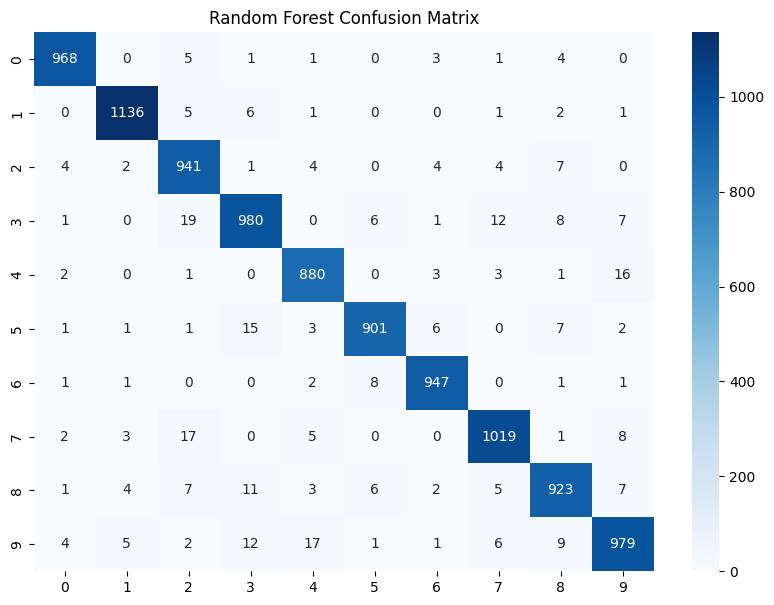

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_sgd = sgd_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("SGD Accuracy:", sgd_clf.score(X_test, y_test))
print("RF Accuracy:", rf_clf.score(X_test, y_test))

# Confusion Matrix (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))


# Step 5: Visualize Errors

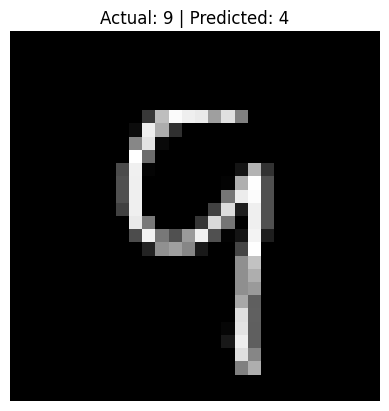

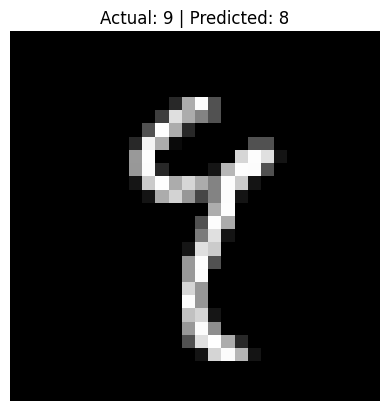

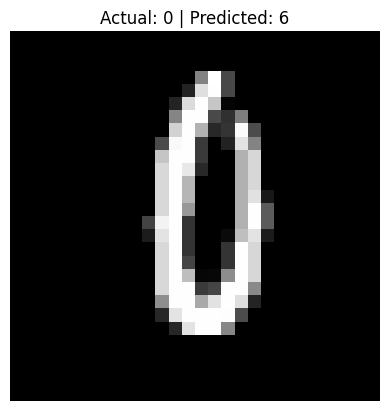

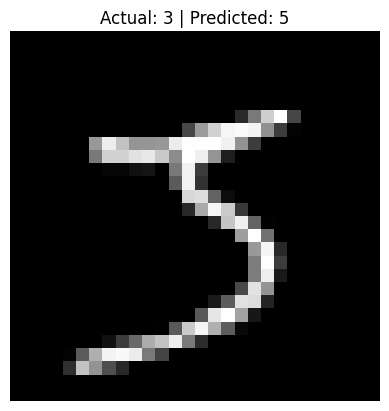

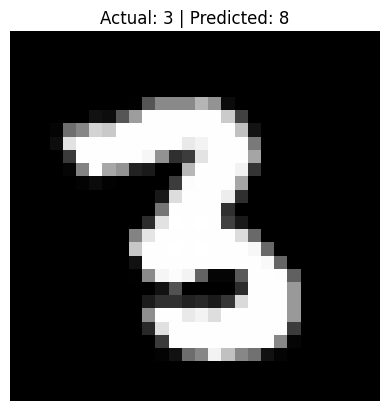

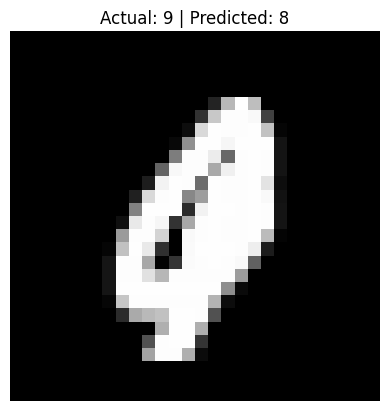

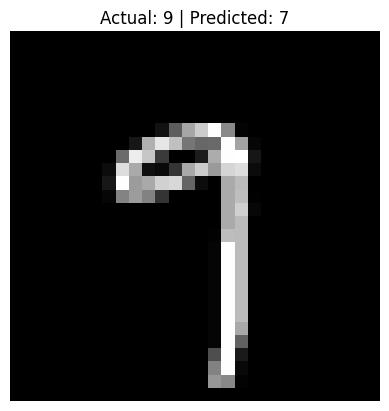

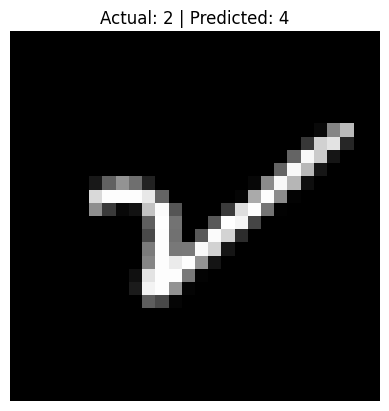

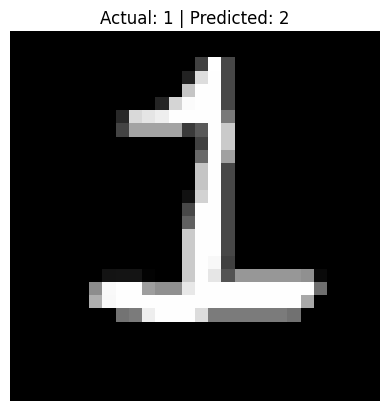

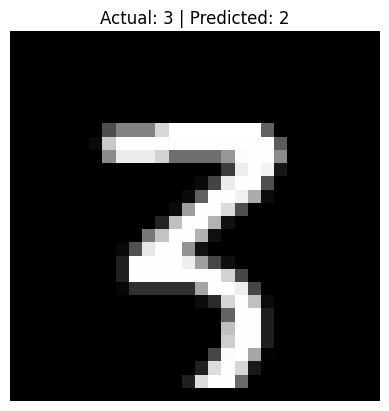

In [ ]:
import numpy as np

# Galtiyan nikaalo
misclassified_idx = np.where(y_test != y_pred_rf)[0]

# Sabse pehli 10 ghalat tasveerain dikhao
for i in range(10):
    idx = misclassified_idx[i]
    image = X_test[idx].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {y_test[idx]} | Predicted: {y_pred_rf[idx]}")
    plt.axis('off')
    plt.show()


In [ ]:
pip install gradio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.10.1
    Uninstalling gradio_client-1.10.1:
      Successfully uninstalled gradio_client-1.10.1
  Attempting uninstall: gradio
    Found existing installation: gradio 5.31.0
    Uninstalling gradio-5.31.0:
      Successfully uninstalled gradio-5.31.0


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Step 3: Train the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Optional: Print accuracy
print("Model trained! Accuracy:", rf_clf.score(X_test, y_test))


Model trained! Accuracy: 0.9674


#Step 6: Gradio Web App Deployment


In [2]:
import gradio as gr
import numpy as np
from PIL import Image
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Train Random Forest Classifier (only once)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Step 2: Prediction Function
def predict_digit(image):
    if image is None:
        return "Please draw or upload a digit image."

    # Convert to grayscale, resize to 28x28
    img = image.convert("L").resize((28, 28))
    img_array = np.array(img).reshape(1, -1)
    pred = rf_clf.predict(img_array)[0]
    return f"Predicted Digit: {pred}"



In [3]:
# Step 3: Gradio Interface with Drawing + Upload support
gr.Interface(
    fn=predict_digit,
    # Removed the 'tool="sketch"' argument as it's not supported
    inputs=gr.Image(type="pil", image_mode="L"),
    outputs=gr.Textbox(),
    title="✍️ MNIST Digit Classifier",
    description="Draw a digit using your mouse or upload a 28x28 grayscale image. The model will predict it!",
    examples=[] # Remove the problematic example URL
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b06f90c1521fde862.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
